# 08. Unsupervised K-means clustering on Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# K-means Function

def kmeans(X, K, max_iters):
    # Use the first K data points as the initial centroids
    centroids = X[:K]

    for _ in range(max_iters):
        
        expanded_x = X[:, np.newaxis]
        euc_dist = np.linalg.norm(expanded_x - centroids, axis=2)
        
        # Assign each data point to the nearest centroid
        labels = np.argmin(euc_dist, axis=1)

        # Update the centroids based on the assigned points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # If the centroids did not change, stop iterating
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids
    

In [7]:
# Fit Model

X=np.array(df.iloc[:,:-1].values)
labels,c=kmeans(X,3,200)
print(labels)
print(c)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 25.           5.00612245   3.42040816   1.46530612   0.24489796]
 [ 74.5          5.922        2.78         4.206        1.304     ]
 [125.           6.57058824   2.97058824   5.52352941   2.01176471]]


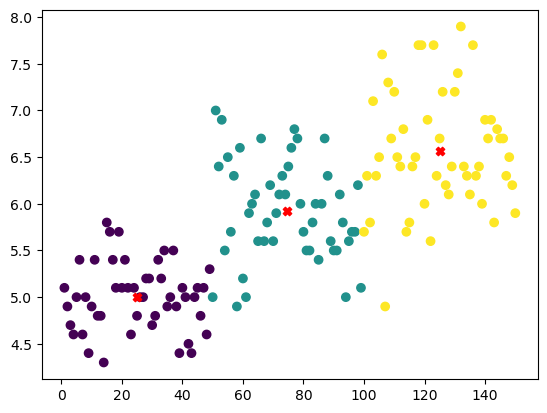

In [8]:
#Plot Graph

plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(c[:,0],c[:,1],marker="X",color="red")
plt.show()

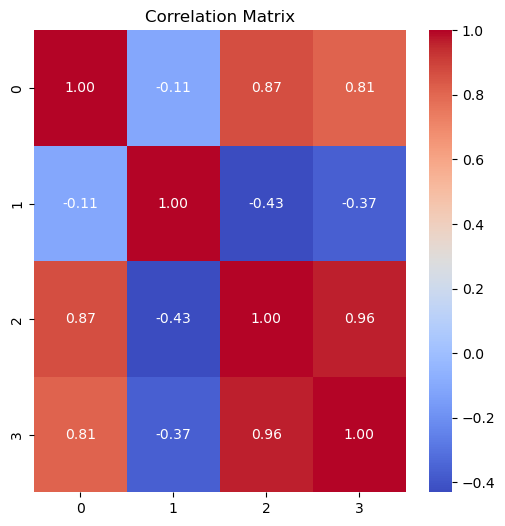

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Labels: [0. 1. 2. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
Centroids: [[-0.60641634  1.90690616 -1.27526947 -1.21201901]
 [-1.17606269 

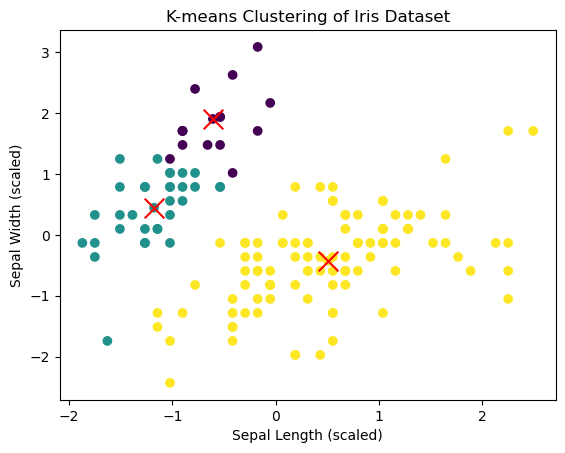

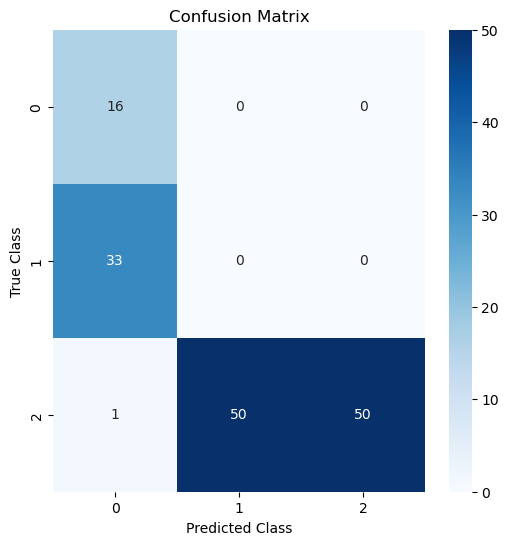

The accuracy is:  0.44


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

def kmeans(X, K):
    # Step 1: Initialize centroids with the first K samples
    centroids = X[:K]
    
    # Step 1: Assign the remaining n-K samples to the nearest centroid and update centroids
    pointsPerCentroid=[[] for _ in range(K)]
    for i in range(K, len(X)):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        pointsPerCentroid[nearest_centroid].append(X[i])
        centroids[nearest_centroid] = np.mean(pointsPerCentroid[nearest_centroid],axis=0)

    labels = np.zeros(X.shape[0])
    print(labels)
    # Step 2: Assign each sample to the nearest centroid without updating centroids
    for i in range(len(X)):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        labels[i] = nearest_centroid
    
    return labels, centroids

# Load the iris dataset and preprocess it
iris = load_iris()
X = iris.data
y = iris.target


# Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Calculate and plot the correlation matrix
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

K = 3
labels, centroids = kmeans(X_scaled, K)
print("Labels:", labels)
print("Centroids:", centroids)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

# Calculate and plot the confusion matrix
# the X-axis in the plot is for the predicted class and the Y-axis is for the true class. 
conf_matrix = confusion_matrix(labels, y)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

print("The accuracy is: ", accuracy_score(labels,y))